In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install holidays

In [3]:
pip install Boruta

     |████████████████████████████████| 61kB 7.6MB/s 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

from IPython.core.display  import HTML
from IPython.display       import Image
from datetime              import date
from tabulate              import tabulate
from scipy.stats           import chi2_contingency

from boruta                import BorutaPy
from sklearn.ensemble      import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import random
import warnings
warnings.filterwarnings( 'ignore' )

In [5]:
def mean_percentage_error ( y, yhat ):
    return np.mean( ( y - yhat )/ y )*100

def cross_validation( X_training, kfold, model_name, model, verbose=False ):
    
    mae_list  = []
    mape_list = []
    rmse_list = []
    for k in reversed( range( 1, kfold+1 ) ):
        if verbose:
            print( '\nKFold Number: {}'.format( k ) )
        # start and end date for validation
        validation_start_date_1  = X_training[X_training['electric_company']==1]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_2  = X_training[X_training['electric_company']==2]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_3  = X_training[X_training['electric_company']==3]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_4  = X_training[X_training['electric_company']==4]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_5  = X_training[X_training['electric_company']==5]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_6  = X_training[X_training['electric_company']==6]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_7  = X_training[X_training['electric_company']==7]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_8  = X_training[X_training['electric_company']==8]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_9  = X_training[X_training['electric_company']==9]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_10 = X_training[X_training['electric_company']==10]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_11 = X_training[X_training['electric_company']==11]['datetime'].max() - datetime.timedelta( days=k*12*30 )
        validation_start_date_12 = X_training[X_training['electric_company']==12]['datetime'].max() - datetime.timedelta( days=k*12*30 )

        validation_end_date_1    = X_training[X_training['electric_company']==1]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_2    = X_training[X_training['electric_company']==2]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_3    = X_training[X_training['electric_company']==3]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_4    = X_training[X_training['electric_company']==4]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_5    = X_training[X_training['electric_company']==5]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_6    = X_training[X_training['electric_company']==6]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_7    = X_training[X_training['electric_company']==7]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_8    = X_training[X_training['electric_company']==8]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_9    = X_training[X_training['electric_company']==9]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_10   = X_training[X_training['electric_company']==10]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_11   = X_training[X_training['electric_company']==11]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
        validation_end_date_12   = X_training[X_training['electric_company']==12]['datetime'].max() - datetime.timedelta( days=(k-1)*12*30 )
            
        # filtering dataset
        training = X_training[ ( (X_training['electric_company']==1) & (X_training['datetime'] < validation_start_date_1) )
                 | ( (X_training['electric_company']==2) & (X_training['datetime'] < validation_start_date_2) )
                 | ( (X_training['electric_company']==3) & (X_training['datetime'] < validation_start_date_3) )
                 | ( (X_training['electric_company']==4) & (X_training['datetime'] < validation_start_date_4) )
                 | ( (X_training['electric_company']==5) & (X_training['datetime'] < validation_start_date_5) )
                 | ( (X_training['electric_company']==6) & (X_training['datetime'] < validation_start_date_6) )
                 | ( (X_training['electric_company']==7) & (X_training['datetime'] < validation_start_date_7) )
                 | ( (X_training['electric_company']==8) & (X_training['datetime'] < validation_start_date_8) )
                 | ( (X_training['electric_company']==9) & (X_training['datetime'] < validation_start_date_9) )
                 | ( (X_training['electric_company']==10)  & (X_training['datetime'] < validation_start_date_10) ) 
                 | ( (X_training['electric_company']==11) & (X_training['datetime'] < validation_start_date_11) )
                 | ( (X_training['electric_company']==12) & (X_training['datetime'] < validation_start_date_12) ) ]
        
        validation = X_training[ ( (X_training['electric_company']==1) & (X_training['datetime'] >= validation_start_date_1) & (X_training['datetime'] <= validation_end_date_1) ) 
                 | ( (X_training['electric_company']==2) & (X_training['datetime'] >= validation_start_date_2) & (X_training['datetime'] <= validation_end_date_2) )
                 | ( (X_training['electric_company']==3) & (X_training['datetime'] >= validation_start_date_3) & (X_training['datetime'] <= validation_end_date_3) )
                 | ( (X_training['electric_company']==4) & (X_training['datetime'] >= validation_start_date_4) & (X_training['datetime'] <= validation_end_date_4) )
                 | ( (X_training['electric_company']==5) & (X_training['datetime'] >= validation_start_date_5) & (X_training['datetime'] <= validation_end_date_5) )
                 | ( (X_training['electric_company']==6) & (X_training['datetime'] >= validation_start_date_6) & (X_training['datetime'] <= validation_end_date_6) )
                 | ( (X_training['electric_company']==7) & (X_training['datetime'] >= validation_start_date_7) & (X_training['datetime'] <= validation_end_date_7) )
                 | ( (X_training['electric_company']==8) & (X_training['datetime'] >= validation_start_date_8) & (X_training['datetime'] <= validation_end_date_8) )
                 | ( (X_training['electric_company']==9) & (X_training['datetime'] >= validation_start_date_9) & (X_training['datetime'] <= validation_end_date_9) )
                 | ( (X_training['electric_company']==10) & (X_training['datetime'] >= validation_start_date_10) & (X_training['datetime'] <= validation_end_date_10) ) 
                 | ( (X_training['electric_company']==11) & (X_training['datetime'] >= validation_start_date_11) & (X_training['datetime'] <= validation_end_date_11) )
                 | ( (X_training['electric_company']==12) & (X_training['datetime'] >= validation_start_date_12) & (X_training['datetime'] <= validation_end_date_12) ) ]
        
        # training and validation dataset
        # training
        xtraining = training.drop( ['datetime', 'mw_energy_consumption' ], axis=1 )
        ytraining = training['mw_energy_consumption']

        #validation
        xvalidation = validation.drop( ['datetime', 'mw_energy_consumption'], axis=1 )
        yvalidation = validation['mw_energy_consumption']

        # model
        m = model.fit( xtraining, ytraining )

        # prediction
        yhat = m.predict( xvalidation )

        # performance
        m_result = ml_error( model_name, np.expm1( yvalidation ), np.expm1( yhat ) )

        # store performance of each kfold interation
        mae_list.append( m_result['MAE'] )
        mape_list.append( m_result['MAPE'] )
        rmse_list.append( m_result['RMSE'] )

    return pd.DataFrame( { 'Model Name': model_name,
                            'MAE CV': np.round( np.mean( mae_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
                            'MAPE CV': np.round( np.mean( mape_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( mape_list ), 2 ).astype( str ),
                            'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ) }, index=[0] )

def mean_absolute_percentage_error( y, yhat ):
    return np.mean( np.abs( (y - yhat ) / y ) )*100

def ml_error( model_name, y, yhat ):
    mae = mean_absolute_error( y, yhat )
    mape = mean_absolute_percentage_error( y, yhat )
    rmse = np.sqrt(np.mean(np.square(((y - yhat ) / y )), axis=0))*100
    
    return pd.DataFrame( { 'Model Name': model_name,
                           'MAE': mae,
                           'MAPE': mape,
                           'RMSE': rmse }, index=[0] )

def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)

    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [6]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [7]:
aep = pd.read_csv( '/content/drive/MyDrive/datasett/AEP_hourly.csv', low_memory=False )
comed = pd.read_csv( '/content/drive/MyDrive/datasett/COMED_hourly.csv', low_memory=False )
dayton = pd.read_csv( '/content/drive/MyDrive/datasett/DAYTON_hourly.csv', low_memory=False )
deok = pd.read_csv( '/content/drive/MyDrive/datasett/DEOK_hourly.csv', low_memory=False )
dom = pd.read_csv( '/content/drive/MyDrive/datasett/DOM_hourly.csv', low_memory=False )
duq = pd.read_csv( '/content/drive/MyDrive/datasett/DUQ_hourly.csv', low_memory=False )
ekpc = pd.read_csv( '/content/drive/MyDrive/datasett/EKPC_hourly.csv', low_memory=False )
fe = pd.read_csv( '/content/drive/MyDrive/datasett/FE_hourly.csv', low_memory=False )
ni = pd.read_csv( '/content/drive/MyDrive/datasett/NI_hourly.csv', low_memory=False )
pjm = pd.read_csv( '/content/drive/MyDrive/datasett/PJM_Load_hourly.csv', low_memory=False )
pjme = pd.read_csv( '/content/drive/MyDrive/datasett/PJME_hourly.csv', low_memory=False )
pjmw = pd.read_csv( '/content/drive/MyDrive/datasett/PJMW_hourly.csv', low_memory=False )

In [8]:
# I will combine all the datasets into one. For this I will create a column in each of the datasets that will identify your respective electric company.

aep['electric_company'] = 'AEP'
comed['electric_company'] = 'COMED'
dayton['electric_company'] = 'DAYTON'
deok['electric_company'] = 'DEOK'
dom['electric_company'] = 'DOM'
duq['electric_company'] = 'DUQ'
ekpc['electric_company'] = 'EKPC'
fe['electric_company'] = 'FE'
ni['electric_company'] = 'NI'
pjm['electric_company'] = 'PJM'
pjme['electric_company'] = 'PJME'
pjmw['electric_company'] = 'PJMW'

In [9]:
# the column in each dataset that shows the Megawatt Energy Consumption, I will rename it with the same name in all.

aep = aep.rename( columns={'AEP_MW': 'mw_energy_consumption'} )
comed = comed.rename( columns={'COMED_MW': 'mw_energy_consumption'} )
dayton = dayton.rename( columns={'DAYTON_MW': 'mw_energy_consumption'} )
deok = deok.rename( columns={'DEOK_MW': 'mw_energy_consumption'} )
dom = dom.rename( columns={'DOM_MW': 'mw_energy_consumption'} )
duq = duq.rename( columns={'DUQ_MW': 'mw_energy_consumption'} )
ekpc = ekpc.rename( columns={'EKPC_MW': 'mw_energy_consumption'} )
fe = fe.rename( columns={'FE_MW': 'mw_energy_consumption'} )
ni = ni.rename( columns={'NI_MW': 'mw_energy_consumption'} )
pjm = pjm.rename( columns={'PJM_Load_MW': 'mw_energy_consumption'} )
pjme = pjme.rename( columns={'PJME_MW': 'mw_energy_consumption'} )
pjmw = pjmw.rename( columns={'PJMW_MW': 'mw_energy_consumption'} )

In [10]:
# Concatenate all the datasets
df_raw = pd.concat( [aep, comed, dayton, deok, dom, duq, ekpc, fe, ni, pjm, pjme, pjmw] )
df_raw.sample(5) # check

,Datetime,mw_energy_consumption,electric_company
31411,2008-08-31 04:00:00,12332.0,AEP
3262,2005-11-19 00:00:00,2027.0,DAYTON
11195,2006-09-21 15:00:00,1751.0,DUQ
64988,2012-11-01 14:00:00,2006.0,DAYTON
31648,2008-08-21 01:00:00,15056.0,AEP


In [11]:
df_raw.shape

(1090167, 3)

In [12]:
# At the beginning of each step I will make a copy of the dataset to make it easier to reload the data in case there is a problem with the project.
df1 = df_raw.copy()

In [13]:
# Although I already renamed some columns when I was preparing the datasets to concatenate them, I will check if there are any more columns that are not in the format I want them to be.
df1.columns

Index(['Datetime', 'mw_energy_consumption', 'electric_company'], dtype='object')

In [14]:
# Only the column "Datetime" don't have the format that I want.
cols_old = ['Datetime', 'mw_energy_consumption', 'electric_company']

# If the dataset had too many columns to change I would use the "snakecase" technique through the "inflection" function. Since this dataset has only one column to change the name, I will do this process manually.
cols_new = ['datetime', 'mw_energy_consumption', 'electric_company']

# rename
df1.columns = cols_new

In [15]:
df1.columns

Index(['datetime', 'mw_energy_consumption', 'electric_company'], dtype='object')

In [16]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )
# Evaluate the possibilite do use this project in your computer

Number of Rows: 1090167
Number of Cols: 3


In [17]:
df1.dtypes
# Observe datetime. It has a different data type.

datetime                  object
mw_energy_consumption    float64
electric_company          object
dtype: object

In [18]:
# function "datetime" transforma the columns "datetime" from object (string) to datetime.
df1['datetime'] = pd.to_datetime( df1['datetime'] )

In [19]:
df1.dtypes

datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
dtype: object

In [20]:
df1.isna().sum()

datetime                 0
mw_energy_consumption    0
electric_company         0
dtype: int64

In [21]:
# We don't have NA value to fillout... :)

In [22]:
# We already did the change types.

In [23]:
# divide into numerical and categorical columns, as they will be treated with different techniques.
num_attributes = df1.select_dtypes( include=['float64'] )
cat_attributes = df1.select_dtypes( exclude=['float64', 'datetime64[ns]'] )

In [24]:
num_attributes.sample()

,mw_energy_consumption
21246,11575.0


In [25]:
cat_attributes.sample()

,electric_company
179,DEOK


#  Numerical Attibutes

In [26]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

In [27]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,mw_energy_consumption,0.0,62009.0,62009.0,11209.58865,8217.0,10534.394704,1.356423,1.198281


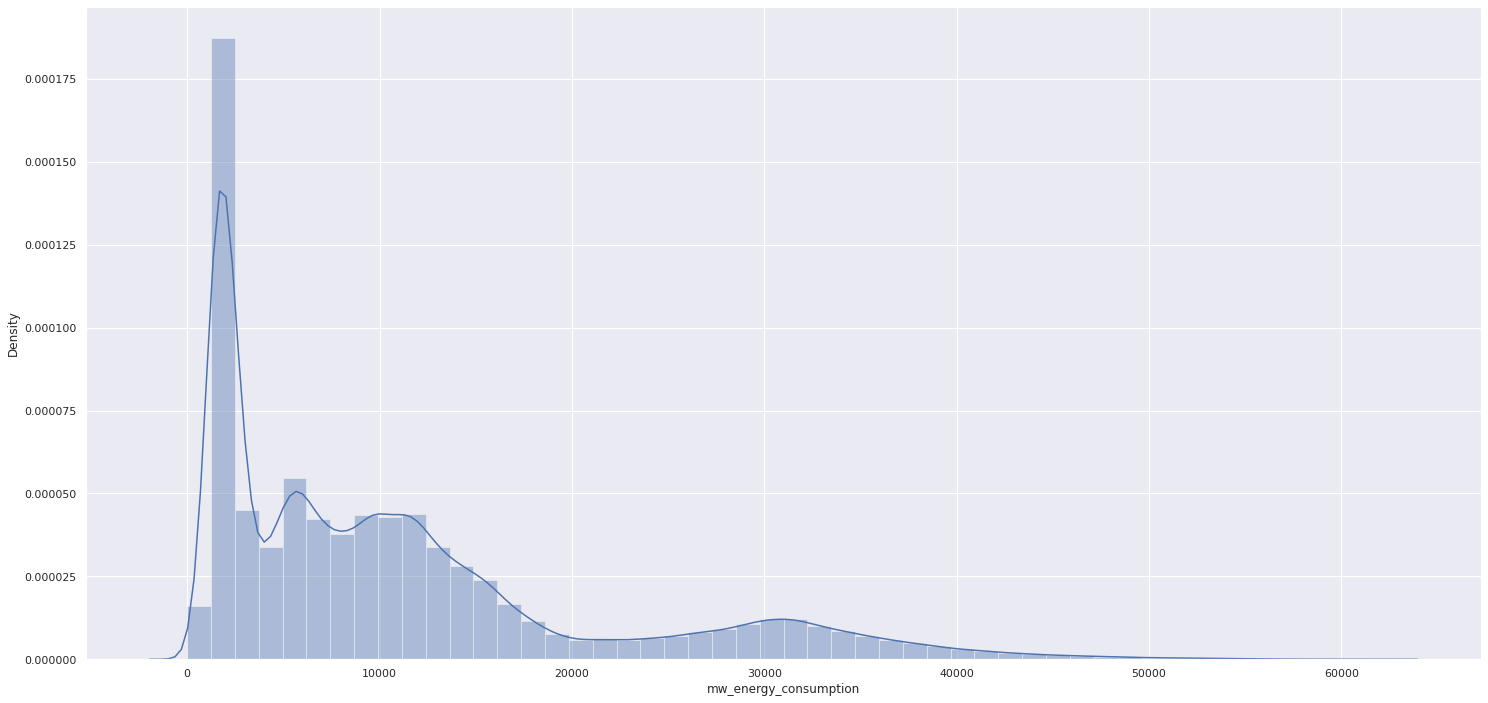

In [28]:
sns.distplot( df1['mw_energy_consumption'] )

1.7.2 Categorical Attibutes

In [29]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

electric_company    12
dtype: int64

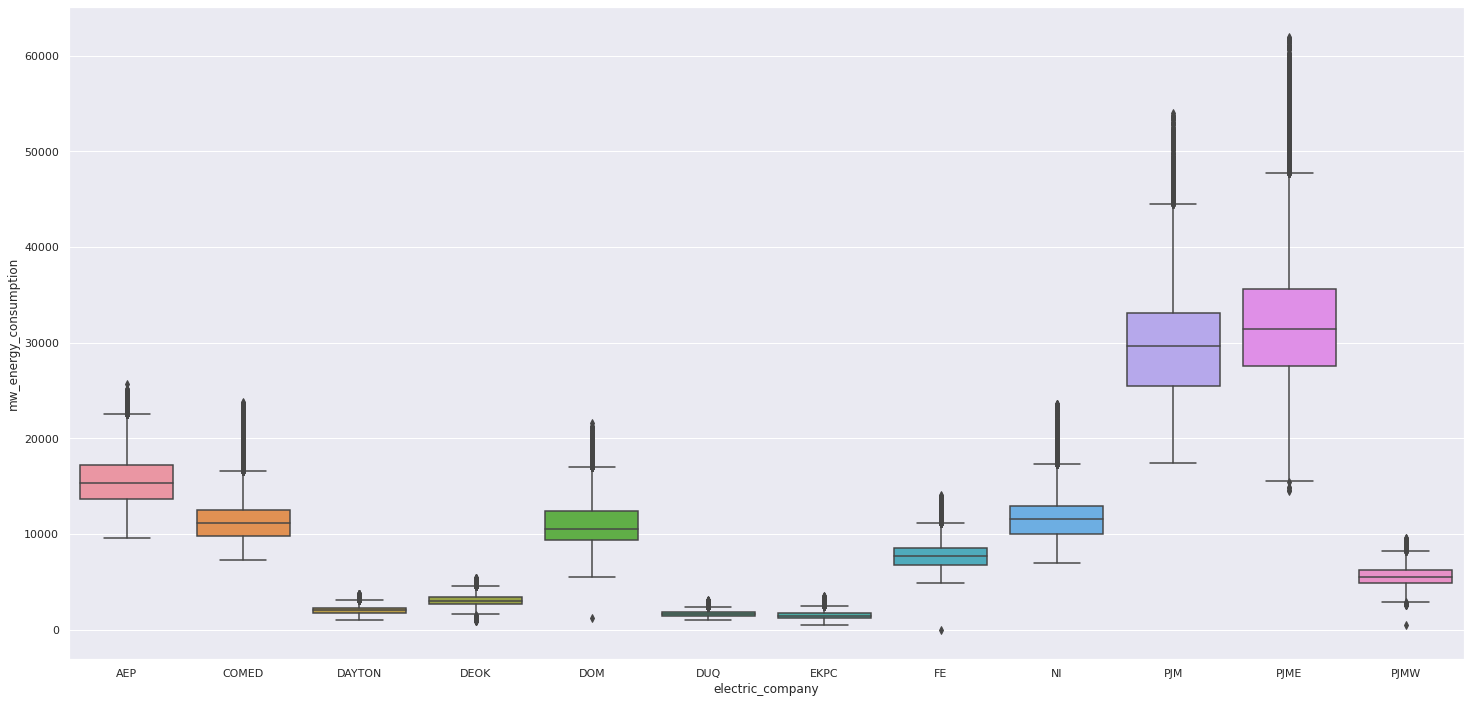

In [30]:
sns.boxplot( x= 'electric_company', y='mw_energy_consumption' , data=df1 )

In [31]:
df2 = df1.copy()

#Feature Engineering

In [32]:
## date
# I want to have a view of the evolution of energy consumption by looking only at the dates as information, excluding an hour when they were recorded.

df2['date'] = df2['datetime'].dt.date

## year
# I will not directly validate any hypothesis with the date "year", but I will use this information to better visualize some variables in the validation process within the EDA.

df2['year'] = df2['datetime'].dt.year

## month
# I will not directly validate any hypothesis with the date "month", but I will use this information to better visualize some variables in the validation process within the EDA.

df2['month'] = df2['datetime'].dt.month

## hour_of_day:

# Initially I thought about converting the hours in the "datetime" column to float, because it would be better to visualize the energy consumption by the evolution of the hours, but observing the part of the hours in the "datetime" column we can see that all of them have only the same hour and not the minute and second. For this reason I will only create the "hour_of_day" column using the "hour" function.

df2['hour_of_day'] = df2['datetime'].dt.hour

# season:

# - Winter -> December (12), January (01) and February (02);
# - Spring -> March (03), April (04) and May (05);
# - Summer -> Jun (06), July (07) and August (08);
# - Autumn -> September (09), October (10) and November (11).

df2['season'] = df2['datetime'].apply( lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if  x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if  x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if  x.month == 9 or x.month == 10 or x.month == 11 else '')

## holiday:

# I will use the "holidays" library to identify whether the date represents a holiday. An idea for a next cycle in the project is to differentiate, according to some rule, the different dates of the holidays.
# The documentation of this librarie is in this link: https://pypi.org/project/holidays/
# Another rule that I will use is to consider the eve of the dates as a "holiday".

df2['holidays'] = df2['datetime'].apply( lambda x: 'Holiday' if x in holidays.US() else 'Holiday' if x + datetime.timedelta(days=1) in holidays.US() else 'Normal day' )

## day_of_week:

# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday

df2['day_of_week'] = df2['datetime'].dt.weekday

In [33]:
# Recheck data types after feature engineering
df2.dtypes

datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
date                             object
year                              int64
month                             int64
hour_of_day                       int64
season                           object
holidays                         object
day_of_week                       int64
dtype: object

In [34]:
# The column "date" is a datetime type columns, but it is like a object type column. I will change the type.
df2['date'] = pd.to_datetime( df2['date'] )

In [35]:
df2.dtypes

datetime                 datetime64[ns]
mw_energy_consumption           float64
electric_company                 object
date                     datetime64[ns]
year                              int64
month                             int64
hour_of_day                       int64
season                           object
holidays                         object
day_of_week                       int64
dtype: object

In [36]:
num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [37]:
df2.sample(10).T

,12671,55653,12831,74946,58912,20597,3103,115447,83506,73177
datetime,2013-07-22 03:00:00,2011-04-27 11:00:00,2012-07-15 19:00:00,2010-03-15 13:00:00,2008-04-11 06:00:00,2004-08-25 11:00:00,1998-08-24 09:00:00,2018-01-31 03:00:00,2014-09-21 07:00:00,2013-11-26 20:00:00
mw_energy_consumption,2928,11365,18659,5927,24715,37986,37198,14484,10896,2404
electric_company,DEOK,DOM,COMED,PJMW,PJME,PJME,PJM,DOM,AEP,DAYTON
date,2013-07-22 00:00:00,2011-04-27 00:00:00,2012-07-15 00:00:00,2010-03-15 00:00:00,2008-04-11 00:00:00,2004-08-25 00:00:00,1998-08-24 00:00:00,2018-01-31 00:00:00,2014-09-21 00:00:00,2013-11-26 00:00:00
year,2013,2011,2012,2010,2008,2004,1998,2018,2014,2013
month,7,4,7,3,4,8,8,1,9,11
hour_of_day,3,11,19,13,6,11,9,3,7,20
season,Summer,Spring,Summer,Spring,Spring,Summer,Summer,Winter,Autumn,Autumn
holidays,Normal day,Normal day,Normal day,Normal day,Normal day,Normal day,Normal day,Normal day,Normal day,Normal day
day_of_week,0,2,6,0,4,2,0,2,6,1


# VARIABLE FILTERING

In [38]:
df3 = df2.copy()

In [39]:
df3.head()

,datetime,mw_energy_consumption,electric_company,date,year,month,hour_of_day,season,holidays,day_of_week
0,2004-12-31 01:00:00,13478.0,AEP,2004-12-31,2004,12,1,Winter,Holiday,4
1,2004-12-31 02:00:00,12865.0,AEP,2004-12-31,2004,12,2,Winter,Holiday,4
2,2004-12-31 03:00:00,12577.0,AEP,2004-12-31,2004,12,3,Winter,Holiday,4
3,2004-12-31 04:00:00,12517.0,AEP,2004-12-31,2004,12,4,Winter,Holiday,4
4,2004-12-31 05:00:00,12670.0,AEP,2004-12-31,2004,12,5,Winter,Holiday,4


# Column Selection

In [40]:
# There isn't any column selection to do in this project

#  EXPLORATORY DATA ANALYSIS

In [41]:
df4 = df3.copy()

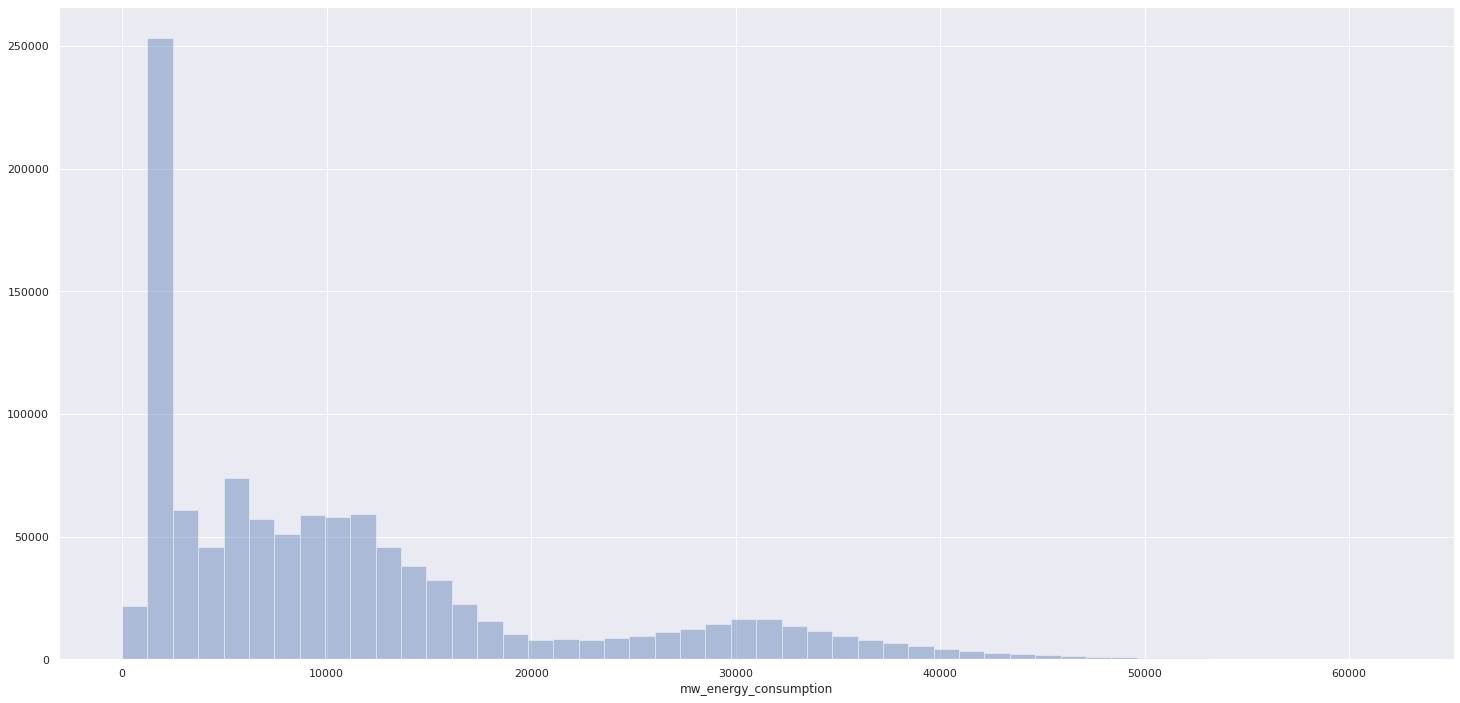

In [42]:
sns.distplot( df4['mw_energy_consumption'], kde=False )

# Numerical Variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff30ed17c50>,
      dtype=object)

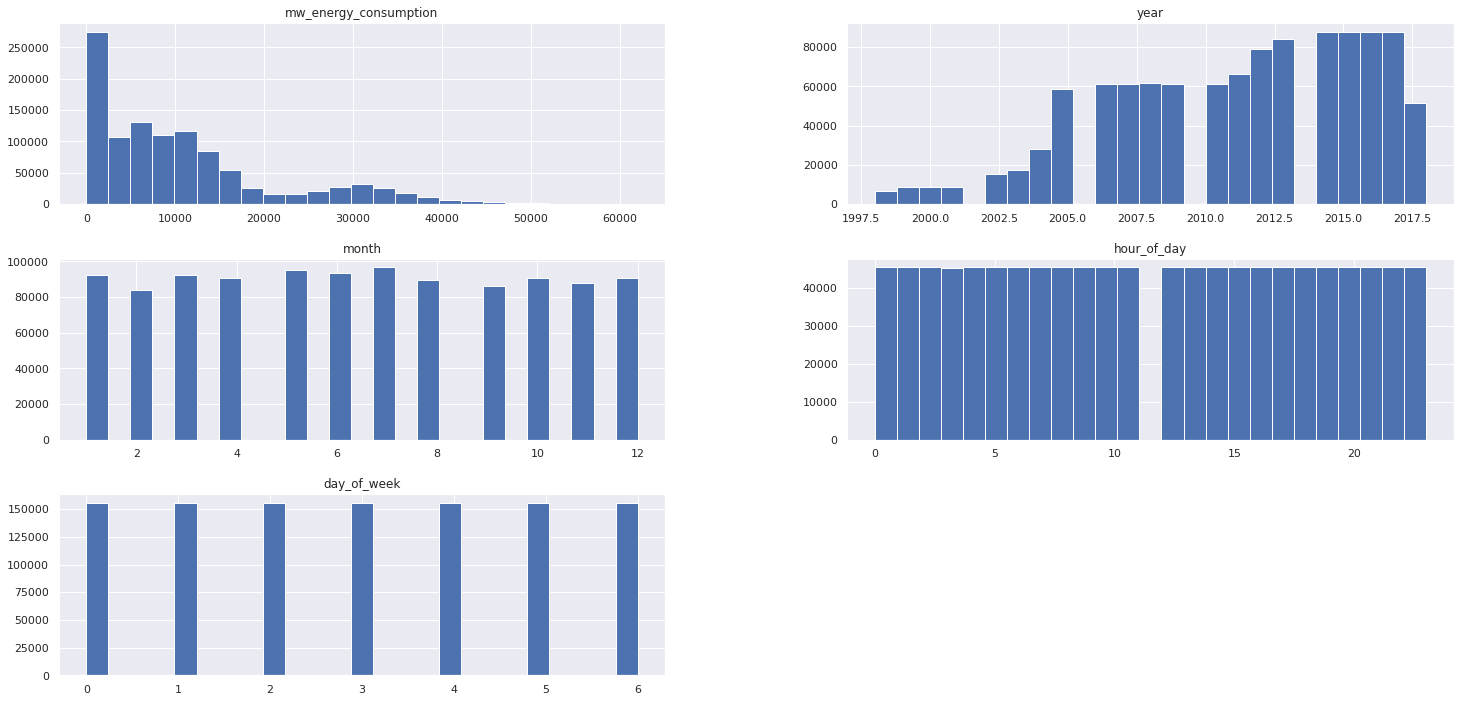

In [43]:
num_attributes.hist( bins=25 )

# Categorical Variable

In [44]:
cat_attributes.head()

,electric_company,season,holidays
0,AEP,Winter,Holiday
1,AEP,Winter,Holiday
2,AEP,Winter,Holiday
3,AEP,Winter,Holiday
4,AEP,Winter,Holiday


In [45]:
df4['electric_company'].drop_duplicates()

0       AEP
0     COMED
0    DAYTON
0      DEOK
0       DOM
0       DUQ
0      EKPC
0        FE
0        NI
0       PJM
0      PJME
0      PJMW
Name: electric_company, dtype: object

In [46]:
df4['season'].drop_duplicates()

0       Winter
744     Autumn
5134    Summer
7342    Spring
Name: season, dtype: object

In [47]:
df4['holidays'].drop_duplicates()

0        Holiday
48    Normal day
Name: holidays, dtype: object

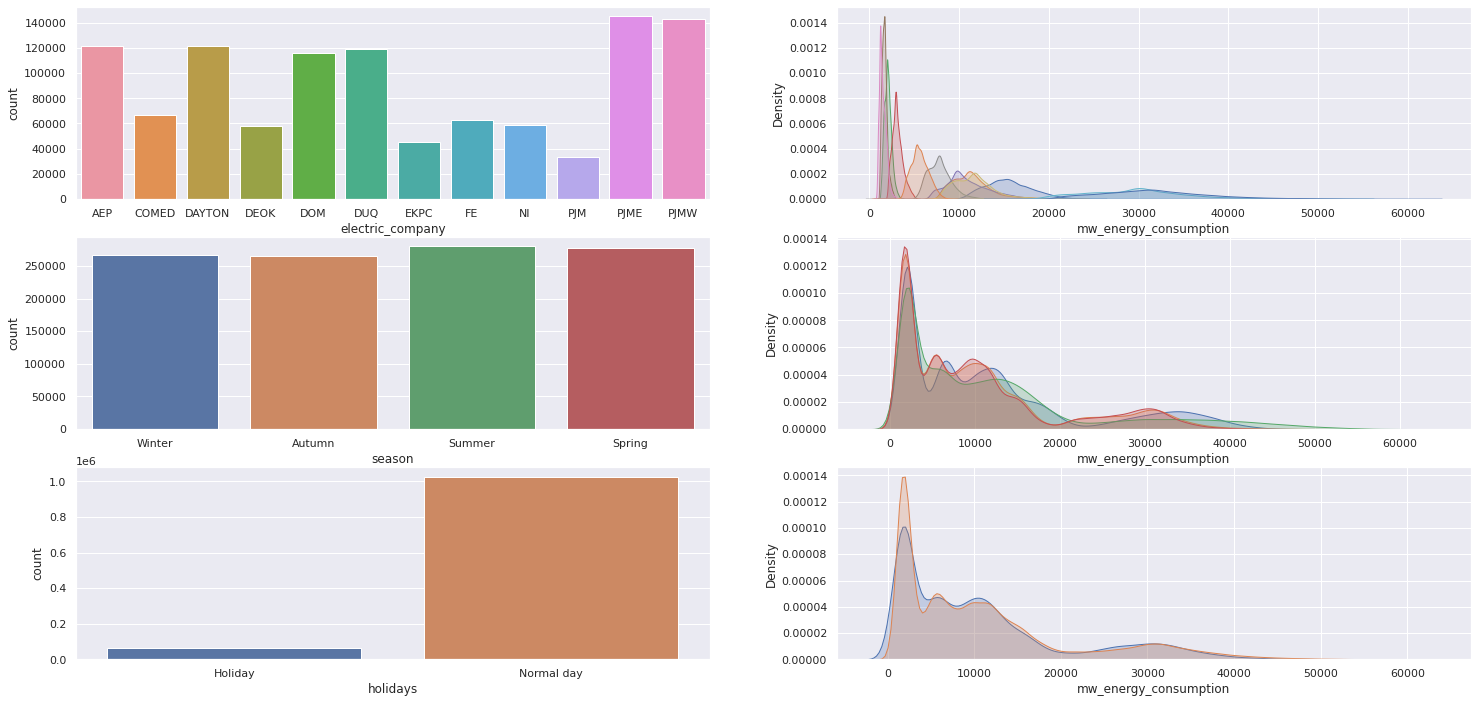

In [48]:
# electric_company

plt.subplot( 3, 2, 1)
sns.countplot( df4['electric_company'] )

plt.subplot( 3, 2, 2)
sns.kdeplot( df4[df4['electric_company'] == 'AEP']['mw_energy_consumption'], label='AEP', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'COMED']['mw_energy_consumption'], label='COMED', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DAYTON']['mw_energy_consumption'], label='DAYTON', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DEOK']['mw_energy_consumption'], label='DEOK', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DOM']['mw_energy_consumption'], label='DOM', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'DUQ']['mw_energy_consumption'], label='DUQ', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'EKPC']['mw_energy_consumption'], label='EKPC', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'FE']['mw_energy_consumption'], label='FE', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'NI']['mw_energy_consumption'], label='NI', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJM']['mw_energy_consumption'], label='PJM', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJME']['mw_energy_consumption'], label='PJME', shade=True )
sns.kdeplot( df4[df4['electric_company'] == 'PJMW']['mw_energy_consumption'], label='PJMW', shade=True )

# season

plt.subplot( 3, 2, 3)
sns.countplot( df4['season'] )

plt.subplot( 3, 2, 4)
sns.kdeplot( df4[df4['season'] == 'Winter']['mw_energy_consumption'], label='Winter', shade=True )
sns.kdeplot( df4[df4['season'] == 'Autumn']['mw_energy_consumption'], label='Autumn', shade=True )
sns.kdeplot( df4[df4['season'] == 'Summer']['mw_energy_consumption'], label='Summer', shade=True )
sns.kdeplot( df4[df4['season'] == 'Spring']['mw_energy_consumption'], label='Spring', shade=True )

# holidays

plt.subplot( 3, 2, 5)
sns.countplot( df4['holidays'] )

plt.subplot( 3, 2, 6)
sns.kdeplot( df4[df4['holidays'] == 'Holiday']['mw_energy_consumption'], label='Holiday', shade=True )
sns.kdeplot( df4[df4['holidays'] == 'Normal day']['mw_energy_consumption'], label='Normal day', shade=True )

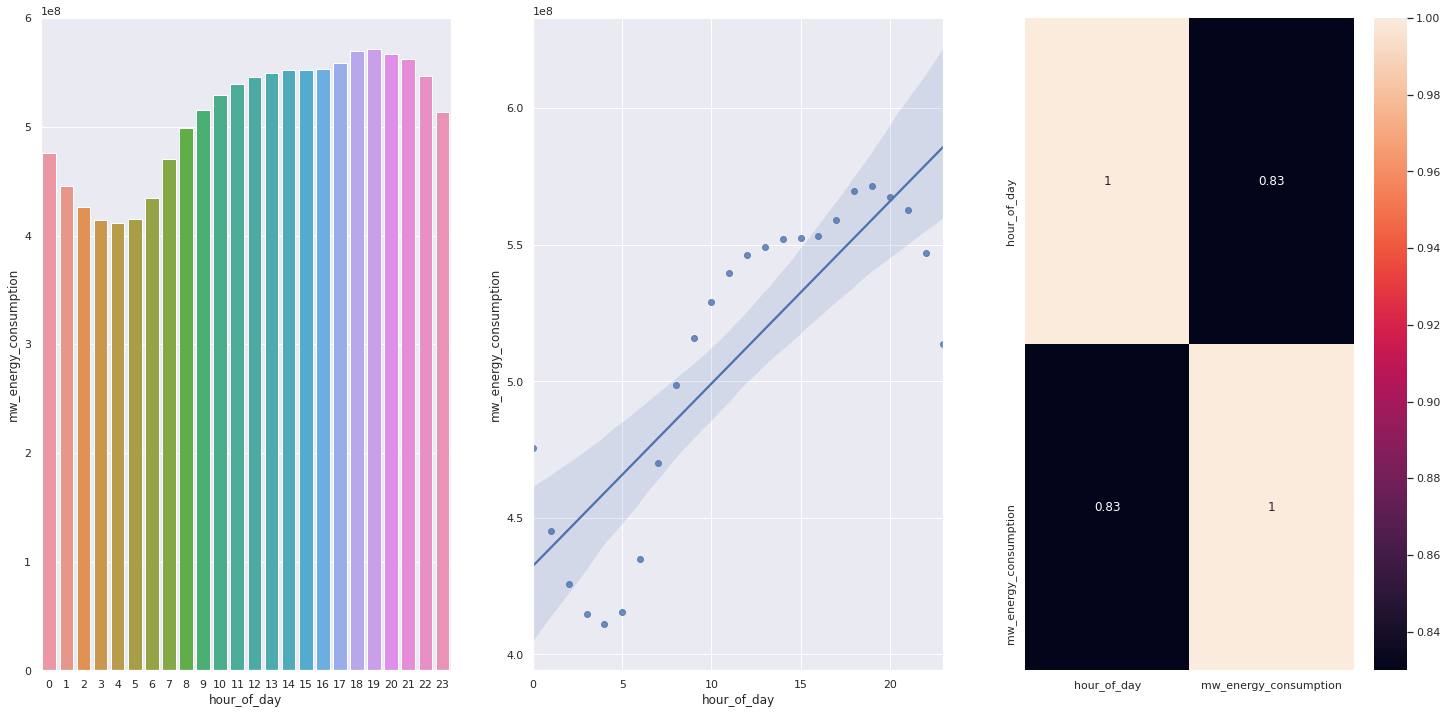

In [49]:
plt.subplot(1,3,1)
aux1 = df4[['hour_of_day', 'mw_energy_consumption']].groupby( 'hour_of_day' ).sum().reset_index()
sns.barplot( x='hour_of_day', y='mw_energy_consumption', data=aux1)

plt.subplot(1,3,2)
sns.regplot( x='hour_of_day', y='mw_energy_consumption', data=aux1 )

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

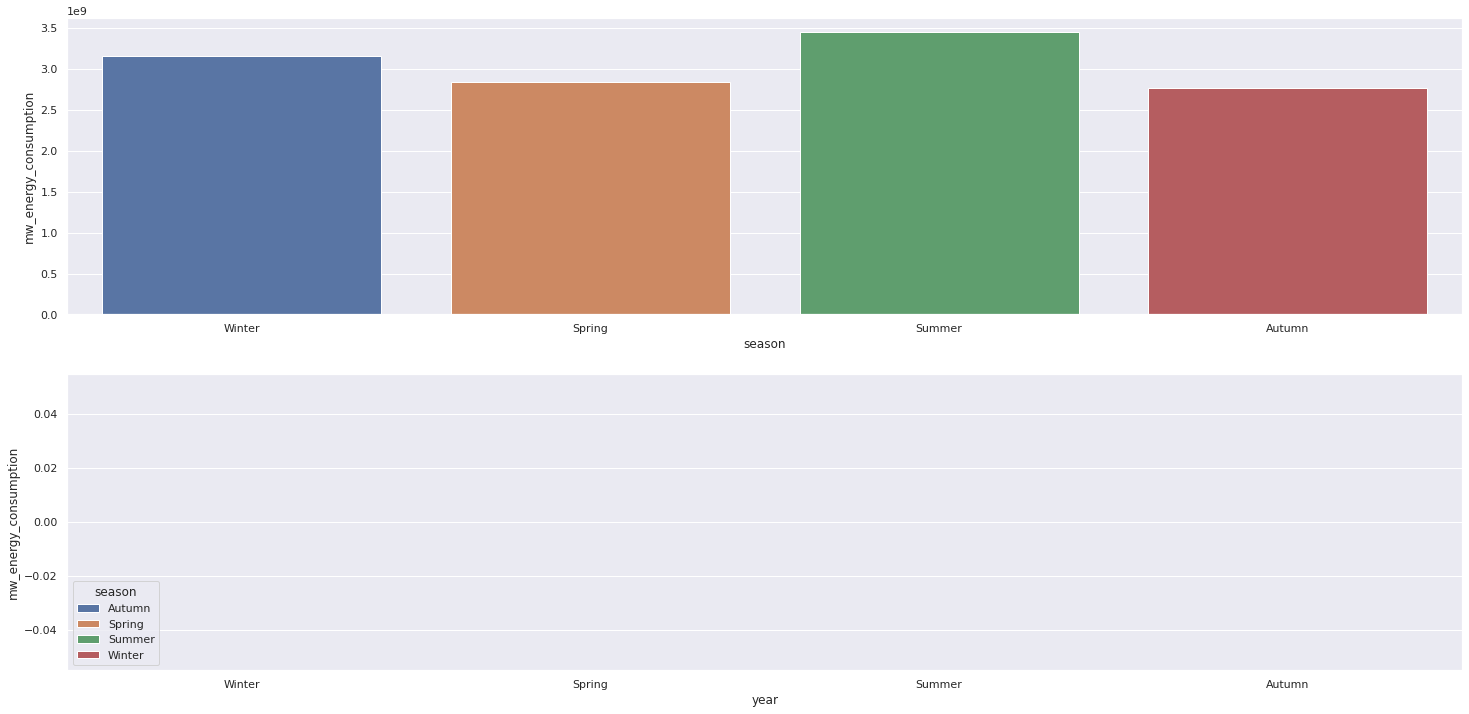

In [50]:
aux1 = df4[['season', 'mw_energy_consumption']].groupby( 'season' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='season', y='mw_energy_consumption', data=aux1, order=['Winter', 'Spring', 'Summer', 'Autumn'] )

aux2 = df4[['year', 'season', 'mw_energy_consumption']].groupby( ['year', 'season'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='mw_energy_consumption', hue='season', data=aux2, order=['Winter', 'Spring', 'Summer', 'Autumn'] );

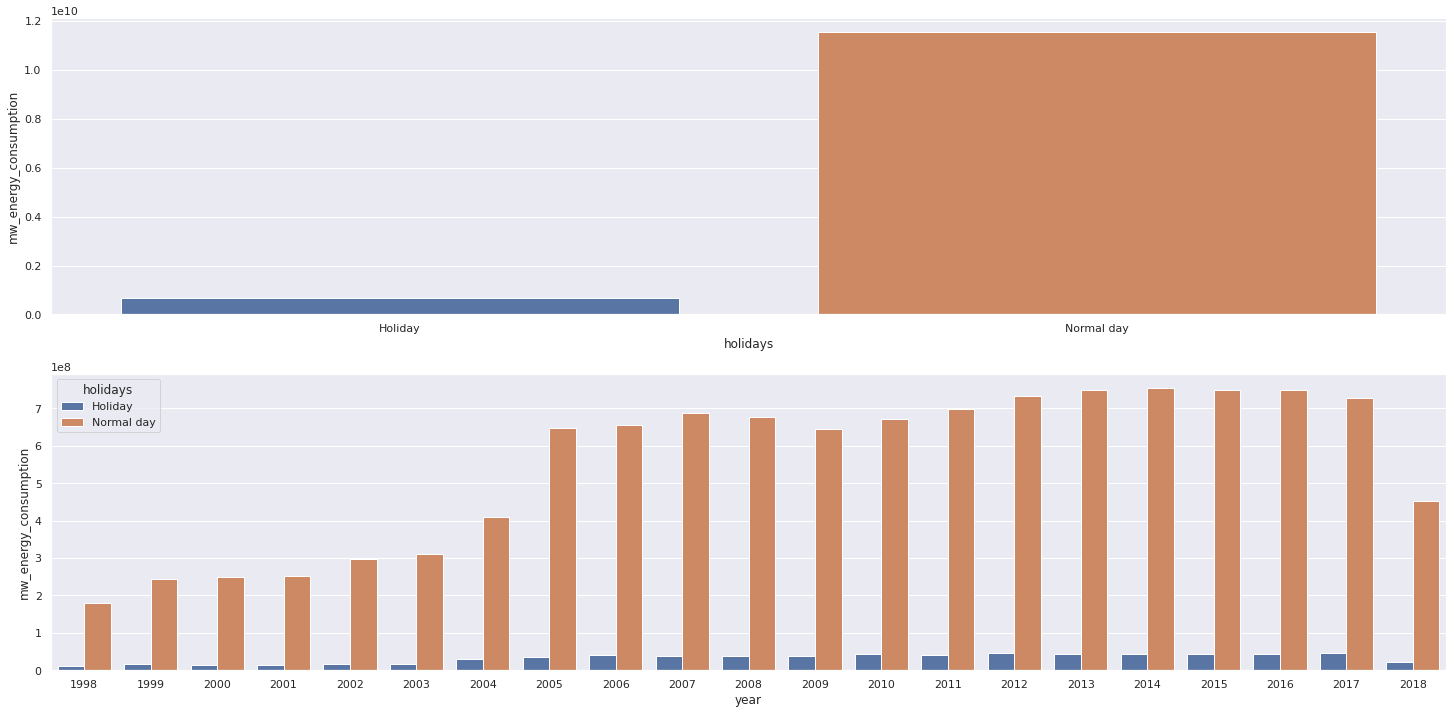

In [51]:
aux1 = df4[['holidays', 'mw_energy_consumption']].groupby( 'holidays' ).sum().reset_index()
plt.subplot( 2, 1, 1 )
sns.barplot( x='holidays', y='mw_energy_consumption', data=aux1 )

aux2 = df4[['year', 'holidays', 'mw_energy_consumption']].groupby( ['year', 'holidays'] ).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='year', y='mw_energy_consumption', hue='holidays', data=aux2 );

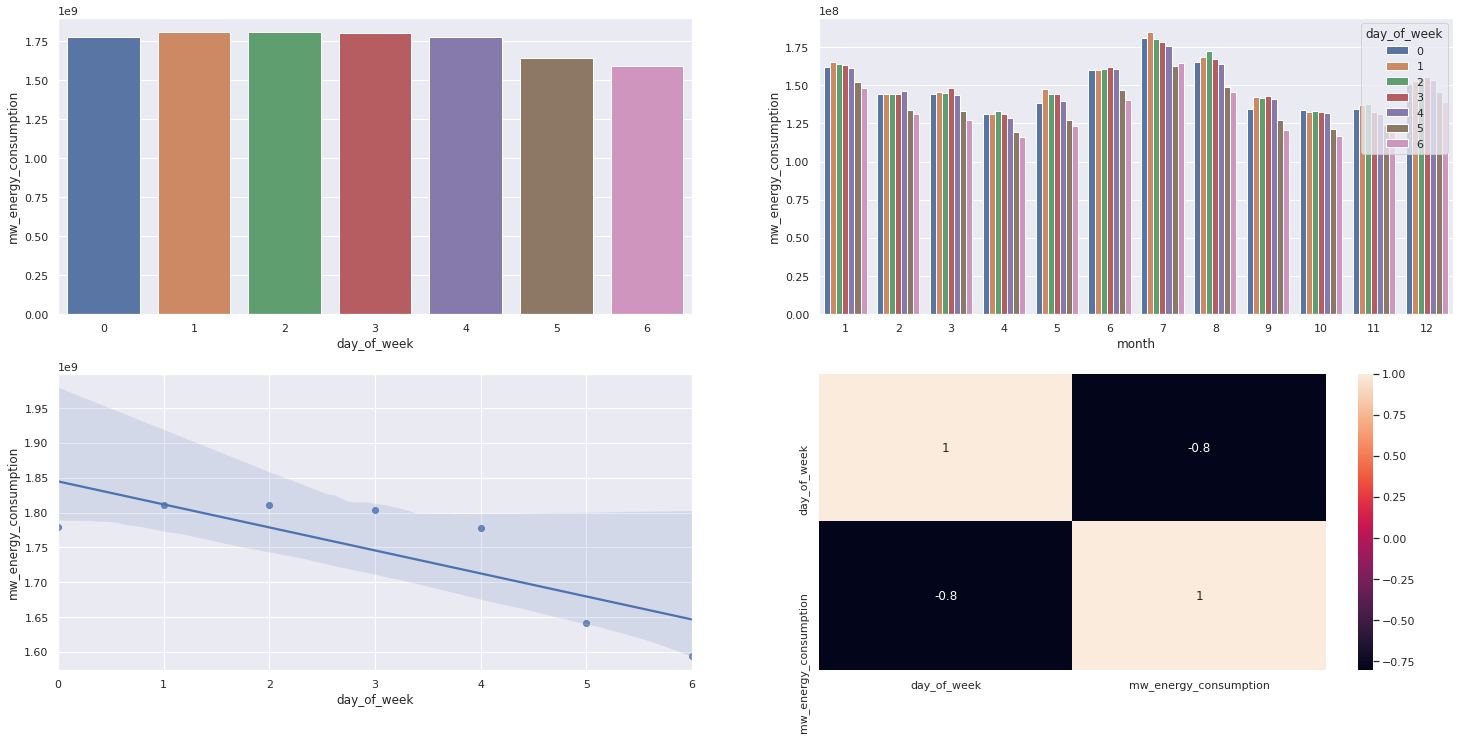

In [52]:
plt.subplot( 2, 2, 1)
aux1 = df4[['day_of_week', 'mw_energy_consumption']].groupby( 'day_of_week' ).sum().reset_index()
sns.barplot( x='day_of_week', y='mw_energy_consumption', data=aux1)

aux2 = df4[['month', 'day_of_week', 'mw_energy_consumption']].groupby( ['month', 'day_of_week'] ).sum().reset_index()
plt.subplot( 2, 2, 2 )
sns.barplot( x='month', y='mw_energy_consumption', hue='day_of_week', data=aux2 );

plt.subplot(2, 2, 3)
sns.regplot( x='day_of_week', y='mw_energy_consumption', data=aux1 )

plt.subplot(2, 2, 4)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

# To better understand what these numbers represent in relation to the days of the week follow the legend below:
# Integer Value             Day of the week
#      0                        Monday
#      1                       Tuesday
#      2                      Wednesday
#      3                      Thursday
#      4                       Friday
#      5                      Saturday
#      6                       Sunday

# Numerical Attributes

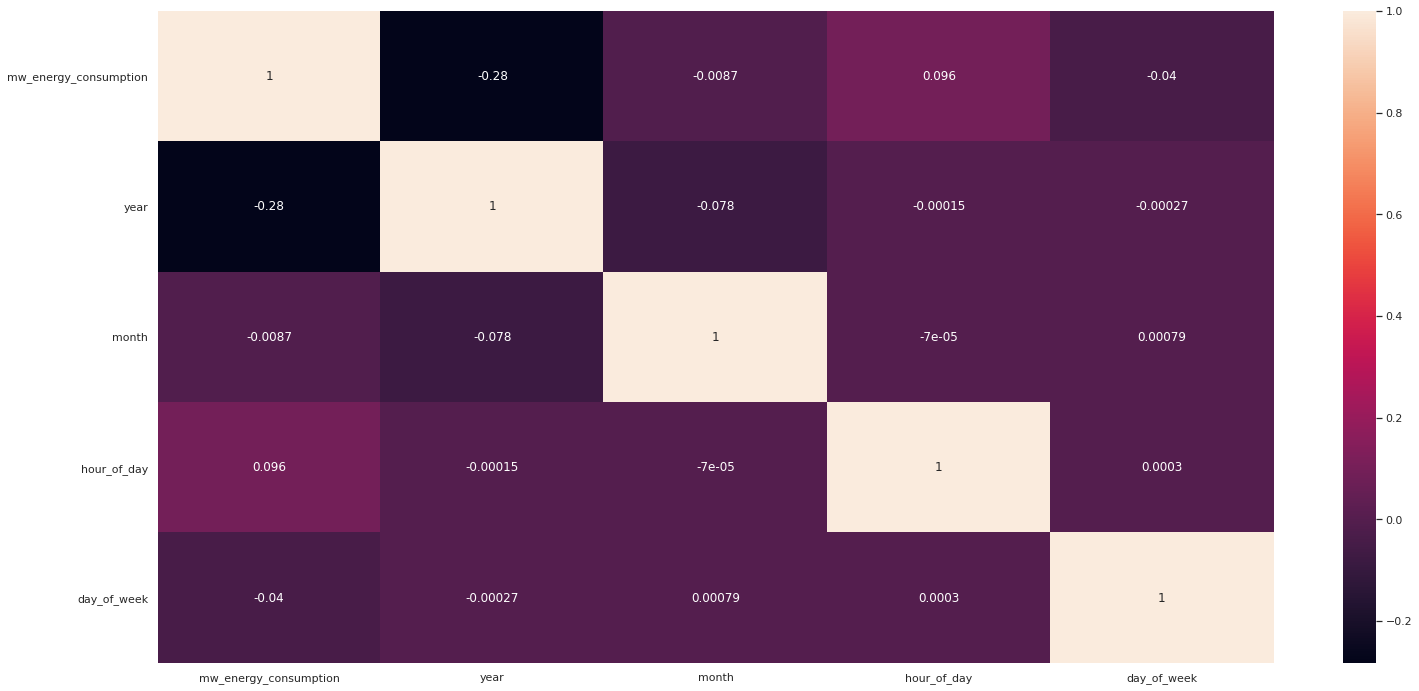

In [53]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True )

# As we can see, the numerical variables (year and month) that we created just to help visualize the evolution of energy consumption, have very little relevance.

# Categorical Attributes

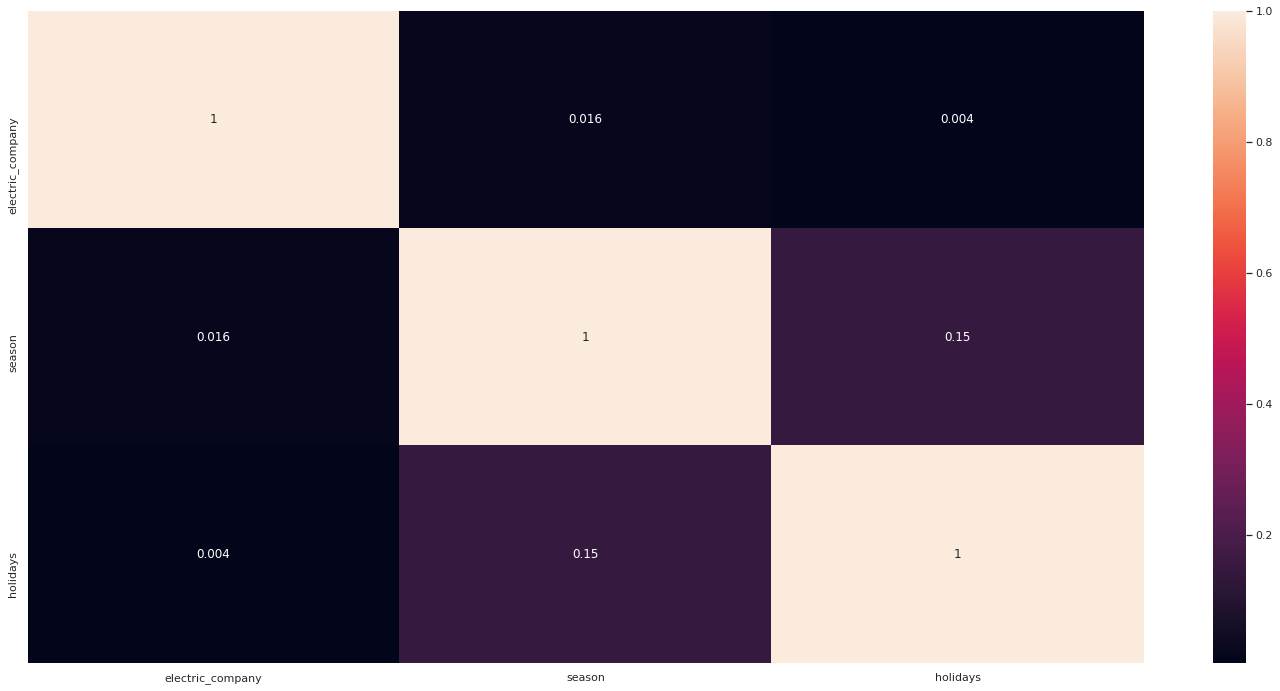

In [54]:
# When we are working with categorical variables we use another statistical technique to visualize the correlations between them. This technique is called "Cramér's V" and a function was created with its formula and it is in the section "0.1 Helper Function".
# In practice, below I will create by hand the correlation table between categorical variables.

# Only categorical data
c1 = cramer_v( cat_attributes['electric_company'], cat_attributes['electric_company'] )

# Calculate cramer V
c2 = cramer_v( cat_attributes['electric_company'], cat_attributes['season'] )
c3 = cramer_v( cat_attributes['electric_company'], cat_attributes['holidays'] )

c4 = cramer_v( cat_attributes['season'], cat_attributes['electric_company'] )
c5 = cramer_v( cat_attributes['season'], cat_attributes['season'] )
c6 = cramer_v( cat_attributes['season'], cat_attributes['holidays'] )

c7 = cramer_v( cat_attributes['holidays'], cat_attributes['electric_company'] )
c8 = cramer_v( cat_attributes['holidays'], cat_attributes['season'] )
c9 = cramer_v( cat_attributes['holidays'], cat_attributes['holidays'] )

# Final dataset
d = pd.DataFrame( {'electric_company': [c1, c2, c3],
               'season': [c4, c5, c6],
               'holidays': [c7, c8, c9]} )

d = d.set_index( d.columns )

sns.heatmap( d, annot=True )

In [55]:
df5 = df4.copy()

#  Encoding

In [56]:
# The only categorical variable which I will use the encoding will be the "holidays". I won't use the "season" in this moment because it's a cyclical variable and I will transform it after soon.

# As the values in the variable "holidays" do not have an important relationship between them and our final dataset will not have many columns I will use the "One Hot Encoding" technique.

df5 = pd.get_dummies( df5, prefix=['holidays'], columns=['holidays'] )

#  Response Variable Transformation

In [57]:
df5['mw_energy_consumption'] = np.log1p( df5['mw_energy_consumption'] )

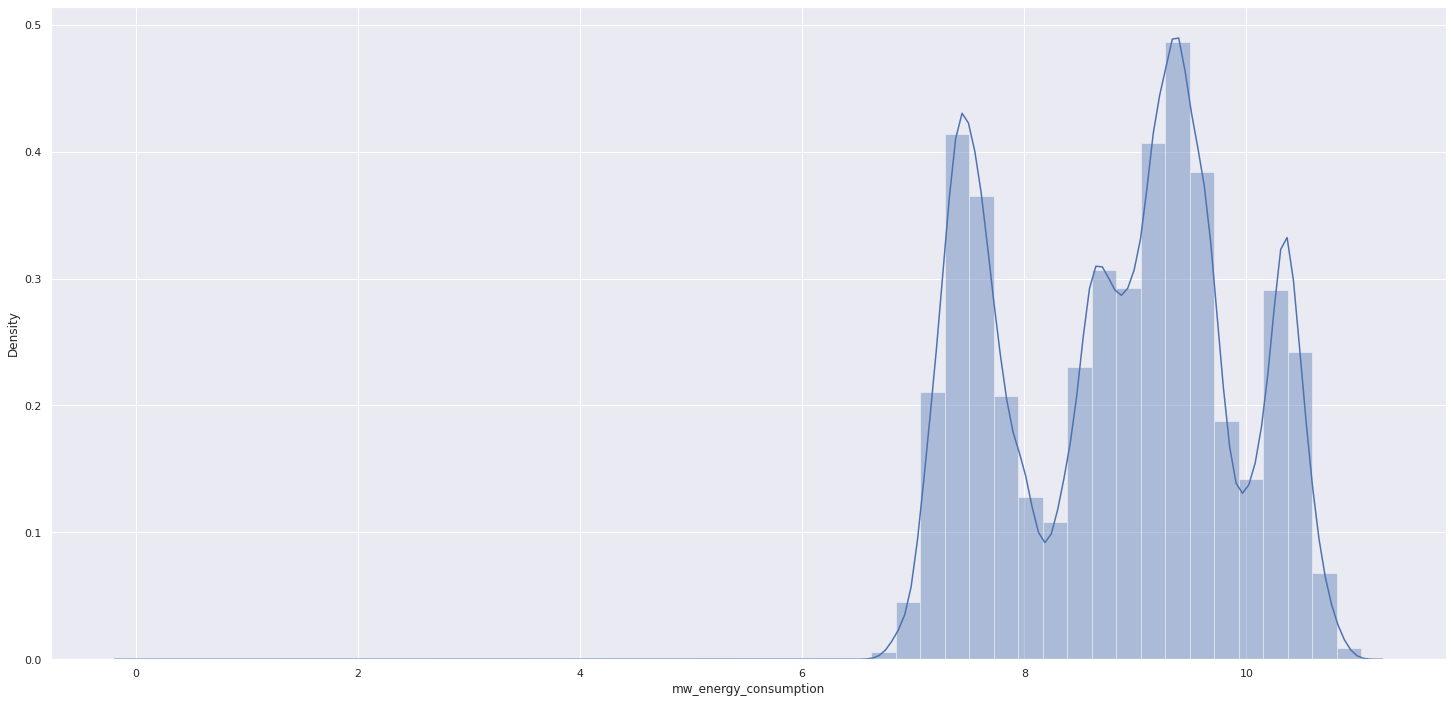

In [58]:
sns.distplot( df5['mw_energy_consumption'] )

#  Nature Transformation

In [59]:
# My goal here is to take the numerical data and transform its natures to cyclical.
# The cyclical variable in this dataset are "hour_of_day", "season" and "day_of_week"

# I am not going to go into mathematical details about the method used to turn numeric or categorical variables into cyclical ones, but I am going to give you an idea of what will be done.
# Cyclic behavior looks like a circle. The code will place the values within each variable in this circle and for this the concepts of sine and cosine will be used. 
# Note that at the end of the formula I divide by the amount of cyclic values present in each variable.

In [60]:
# hour_of_day
df5['hour_of_day_sin'] = df5['hour_of_day'].apply( lambda x: np.sin( x * ( 2. * np.pi/24 ) ) )
df5['hour_of_day_cos'] = df5['hour_of_day'].apply( lambda x: np.cos( x * ( 2. * np.pi/24 ) ) )


# season

# As the variable "season" is categorical I will first turn it into a numeric variable making its values ​​have an ordinal idea, since the seasons follow an order.
assortment_dict = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}
df5['season'] = df5['season'].map( assortment_dict )

df5['season_sin'] = df5['season'].apply( lambda x: np.sin( x * ( 2. * np.pi/4 ) ) )
df5['season_cos'] = df5['season'].apply( lambda x: np.cos( x * ( 2. * np.pi/4 ) ) )


# day_of_week
df5['day_of_week_sin'] = df5['day_of_week'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
df5['day_of_week_cos'] = df5['day_of_week'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )

In [61]:
df5.sample(5)

,datetime,mw_energy_consumption,electric_company,date,year,month,hour_of_day,season,day_of_week,holidays_Holiday,holidays_Normal day,hour_of_day_sin,hour_of_day_cos,season_sin,season_cos,day_of_week_sin,day_of_week_cos
35547,2015-07-13 08:00:00,8.921057,FE,2015-07-13,2015,7,8,3,0,0,1,0.866025,-5.000000e-01,-1.000000e+00,-1.836970e-16,0.000000,1.000000
24913,2007-05-29 08:00:00,7.642044,DAYTON,2007-05-29,2007,5,8,2,1,0,1,0.866025,-5.000000e-01,1.224647e-16,-1.000000e+00,0.781831,0.623490
51760,2017-09-07 21:00:00,8.944811,FE,2017-09-07,2017,9,21,4,3,0,1,-0.707107,7.071068e-01,-2.449294e-16,1.000000e+00,0.433884,-0.900969
63962,2012-12-14 19:00:00,7.698483,DAYTON,2012-12-14,2012,12,19,1,4,0,1,-0.965926,2.588190e-01,1.000000e+00,6.123234e-17,-0.433884,-0.900969
37209,2008-06-04 18:00:00,9.536329,NI,2008-06-04,2008,6,18,3,2,0,1,-1.000000,-1.836970e-16,-1.000000e+00,-1.836970e-16,0.974928,-0.222521


#  FEATURE SELECTION

In [62]:
df6 = df5.copy()

In [63]:
df6.shape

(1090167, 17)

#  Split dataframe into training and test dataset

In [64]:
# First I will drop the columns that I will not use. Basically they are the columns that were only used to generate new columns in the Feature Engineering process.
cols_drop = [ 'year', 'month', 'hour_of_day', 'season', 'day_of_week' ]
df6 = df6.drop( cols_drop, axis=1 )

# # As this is a time-series project, the goal is to forecast energy consumption for the next 6 months. 
# Because of this we have to separate the test and train dataset taking into account the variable "datetime", that is, the most recent 6 months will be in the test dataset and the rest in the train dataset.

# First, I will create a table showing, for the electric company, what is the minimum and maximum date and see if it will be possible to determine the same 6-month cut in the variable "date".
min_max = []
for i in df6['electric_company'].unique():
    min_max.append( [ i, df6[df6['electric_company']==i]['date'].min(), df6[df6['electric_company']==i]['date'].max() ] )

# Creating de dataframe to better visualize.
mm = pd.DataFrame( columns=[ 'electric_company', 'min_date', 'max_date' ], data=min_max )
mm

,electric_company,min_date,max_date
0,AEP,2004-10-01,2018-08-03
1,COMED,2011-01-01,2018-08-03
2,DAYTON,2004-10-01,2018-08-03
3,DEOK,2012-01-01,2018-08-03
4,DOM,2005-05-01,2018-08-03
5,DUQ,2005-01-01,2018-08-03
6,EKPC,2013-06-01,2018-08-03
7,FE,2011-06-01,2018-08-03
8,NI,2004-05-01,2011-01-01
9,PJM,1998-04-01,2002-01-01


In [65]:
# Since we do not have the same minimum and maximum dates for all electrical companies, I will stipulate the minimum and maximum cutoffs for test and training dates for each one.
# Rules:
# - min_date <= TRAIN DATA < cut_date (max_date - 12 months)
# - cut_date (max_date - 12 months) <= TEST DATA <= max_date

# Determine the cutoff date at each electrical company.
cut_date =[]
for i in range( 0, 12 ):
    cut_date.append( [ df6['electric_company'].unique()[i], df6[['electric_company', 'date']].groupby( 'electric_company' ).max().reset_index()['date'][i] - datetime.timedelta( days=12*30 ) ] )

# Creating de dataframe to better visualize.
cd = pd.DataFrame( columns=[ 'electric_company', 'cut_date' ], data=cut_date )
cd

,electric_company,cut_date
0,AEP,2017-08-08
1,COMED,2017-08-08
2,DAYTON,2017-08-08
3,DEOK,2017-08-08
4,DOM,2017-08-08
5,DUQ,2017-08-08
6,EKPC,2017-08-08
7,FE,2017-08-08
8,NI,2010-01-06
9,PJM,2001-01-06


In [66]:
# training dataset
X_train = df6[ ( ( (df6['electric_company']=='AEP') 
                 | (df6['electric_company']=='COMED') 
                 | (df6['electric_company']=='DAYTON') 
                 | (df6['electric_company']=='DEOK') 
                 | (df6['electric_company']=='DOM') 
                 | (df6['electric_company']=='DUQ') 
                 | (df6['electric_company']=='EKPC') 
                 | (df6['electric_company']=='FE') 
                 | (df6['electric_company']=='PJME') 
                 | (df6['electric_company']=='PJMW') ) & (df6['date'] < '2017-08-08') ) 
                 | (df6['electric_company']=='NI') & (df6['date'] < '2010-01-06') 
                 | (df6['electric_company']=='PJM') & (df6['date'] < '2001-01-06') ]

y_train = X_train['mw_energy_consumption']

# test dataset
X_test = df6[ ( ( (df6['electric_company']=='AEP') 
                 | (df6['electric_company']=='COMED') 
                 | (df6['electric_company']=='DAYTON') 
                 | (df6['electric_company']=='DEOK') 
                 | (df6['electric_company']=='DOM') 
                 | (df6['electric_company']=='DUQ') 
                 | (df6['electric_company']=='EKPC') 
                 | (df6['electric_company']=='FE') 
                 | (df6['electric_company']=='PJME') 
                 | (df6['electric_company']=='PJMW') ) & (df6['date'] >= '2017-08-08') ) 
                 | (df6['electric_company']=='NI') & (df6['date'] >= '2010-01-06') 
                 | (df6['electric_company']=='PJM') & (df6['date'] >= '2001-01-06') ]

y_test = X_test['mw_energy_consumption']

# Determine the train min and max date & test min and max date.
train_test =[]
for i in df6['electric_company'].unique():
    train_test.append( [ i, X_train[X_train['electric_company']==i]['date'].min(), X_train[X_train['electric_company']==i]['date'].max(), 
                        X_test[X_test['electric_company']==i]['date'].min(), X_test[X_test['electric_company']==i]['date'].max() ] )

# Creating de dataframe to better visualize.
tt = pd.DataFrame( columns=[ 'electric_company', 'train_min_date', 'train_max_date', 'test_min_date', 'test_max_date' ], data=train_test )
tt

,electric_company,train_min_date,train_max_date,test_min_date,test_max_date
0,AEP,2004-10-01,2017-08-07,2017-08-08,2018-08-03
1,COMED,2011-01-01,2017-08-07,2017-08-08,2018-08-03
2,DAYTON,2004-10-01,2017-08-07,2017-08-08,2018-08-03
3,DEOK,2012-01-01,2017-08-07,2017-08-08,2018-08-03
4,DOM,2005-05-01,2017-08-07,2017-08-08,2018-08-03
5,DUQ,2005-01-01,2017-08-07,2017-08-08,2018-08-03
6,EKPC,2013-06-01,2017-08-07,2017-08-08,2018-08-03
7,FE,2011-06-01,2017-08-07,2017-08-08,2018-08-03
8,NI,2004-05-01,2010-01-05,2010-01-06,2011-01-01
9,PJM,1998-04-01,2001-01-05,2001-01-06,2002-01-01


In [67]:
# For the algorithm understand the variable "electric company" we have to transform from string to number.
assortment_dict = { 'AEP': 1, 'COMED': 2, 'DAYTON': 3, 'DEOK': 4, 'DOM': 5, 'DUQ': 6, 'EKPC': 7, 'FE': 8, 'NI': 9, 'PJM': 10, 'PJME': 11, 'PJMW': 12 }
X_train['electric_company'] = X_train['electric_company'].map( assortment_dict )
X_test['electric_company'] = X_test['electric_company'].map( assortment_dict );

#  Boruta as Feature Selector

In [68]:
# I will use the Boruta algorithm to determine the most relevant variables for the model and then I will compare it with what I decided at the end of the EDA.

# training and test dataset for Boruta
X_train_n = X_train.drop( ['date', 'datetime', 'mw_energy_consumption'], axis=1 ).values
y_train_n = y_train.values.ravel()

# define RandomForestRegression
rf = RandomForestRegressor( n_jobs=-1 )

# define Boruta
boruta = BorutaPy( rf, n_estimators='auto', verbose=2, random_state=42 ).fit( X_train_n, y_train_n )

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	4


#  Best Feature from Boruta

In [69]:
cols_selected = boruta.support_.tolist()

# best feature
X_train_fs = X_train.drop( ['date', 'datetime', 'mw_energy_consumption'], axis=1 )
cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.tolist()

# not selected boruta
cols_not_selected_boruta = list( np.setdiff1d( X_train_fs.columns, cols_selected_boruta ) )

In [70]:
cols_selected_boruta

['electric_company',
 'hour_of_day_sin',
 'hour_of_day_cos',
 'season_sin',
 'day_of_week_sin']

In [71]:
cols_not_selected_boruta

['day_of_week_cos', 'holidays_Holiday', 'holidays_Normal day', 'season_cos']

In [72]:
# Now I will check the features selected by Boruta and compare with the eatures that I selected in EDA.

tab = [['Hypotheses', 'Conclusion', 'Relevance'],
       ['H1', 'False', 'High'], # Confirmed.
       ['H2', 'True', 'Medium'], # Boruta determined as High.
       ['H3', 'False', 'Medium'], # Boruta determined as Low.
       ['H4', 'False', 'High'] # Confirmed.
      ]
print( tabulate( tab, headers='firstrow' ) )

Hypotheses    Conclusion    Relevance
------------  ------------  -----------
H1            False         High
H2            True          Medium
H3            False         Medium
H4            False         High


In [73]:
# Now I will include the "season" and "day_of_week" cosin column.

cols_selected_boruta = [
     'electric_company',
     'hour_of_day_sin',
     'hour_of_day_cos',
     'season_sin',
     'season_cos',
     'day_of_week_sin',
     'day_of_week_cos']

# columns to add
feat_to_add = ['datetime', 'mw_energy_consumption']

# final features
cols_selected_boruta_full = cols_selected_boruta.copy()
cols_selected_boruta_full.extend( feat_to_add )

In [74]:
cols_selected_boruta

['electric_company',
 'hour_of_day_sin',
 'hour_of_day_cos',
 'season_sin',
 'season_cos',
 'day_of_week_sin',
 'day_of_week_cos']

In [75]:
cols_selected_boruta_full

['electric_company',
 'hour_of_day_sin',
 'hour_of_day_cos',
 'season_sin',
 'season_cos',
 'day_of_week_sin',
 'day_of_week_cos',
 'datetime',
 'mw_energy_consumption']

#  MACHINE LEARNING MODELLING

In [76]:
x_train = X_train[ cols_selected_boruta ]
x_test = X_test[ cols_selected_boruta ]

# Time Series Data Preparartion
X_training = X_train[ cols_selected_boruta_full ]

# Before continuing into sessions that we will implement the Machine Learning models, I would like to explain about the error meanings.
# MAE:
# It is usually what I use to report to the business team because is easier to explain.
# It takes the absolute value of the difference between the real and the predicted number and divides it by the number of predictions, that is, for each value that the model predicts it varies the MAE value on average (both for more and for less).
# Due to the way the MAE is calculated, it is not sensitive to outliers. If I'm on a project where having an outlier-sensitive error is super important I will use to evaluate my model another error.
# MAPE:
# It is also used to facilitate the understanding of the business team about the error of your model. 
# The MAPE simply represents the percentage of the MAE, that is, how much the error that the model has means in percentage of the real value.
# RMSE:
# This is the error most used by data scientists to measure the performance of the model and its value serves as a parameter in the process of trying to decrease the model error within the project.
# This high use of RMSE is due to the fact that it is sensitive to outliers and this helps data scientists to be more rigorous with model errors.
# In cases where detecting the presence of outliers is important within the project I use RMSE instead of MAE.

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  LightGBMRegressor

In [78]:
import lightgbm as lgb
model = lgb.LGBMRegressor(objective= 'regression',boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=500, random_state=42 ).fit( x_train, y_train )
# prediction
yhat_model= model.predict( x_test )

# performance
model_result = ml_error( 'LGBMRegressor', np.expm1( y_test ), np.expm1( yhat_model ) )
model_result


,Model Name,MAE,MAPE,RMSE
0,LGBMRegressor,995.018921,9.293761,12.102805


In [79]:
import lightgbm as lgb
model = lgb.LGBMRegressor(objective= 'regression',boosting_type='gbdt', num_leaves=31, max_depth=- 1, learning_rate=0.1, n_estimators=500, random_state=42 )
model.fit( x_train, y_train )

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=500, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=42, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [80]:
# prediction
yhat_model= model.predict( x_test )

# performance
model_result = ml_error( 'LGBMRegressor', np.expm1( y_test ), np.expm1( yhat_model ) )
model_result


,Model Name,MAE,MAPE,RMSE
0,LGBMRegressor,995.018921,9.293761,12.102805


In [81]:
model_result_cv = cross_validation( X_training, 5, 'LGBMRegressor', model, verbose=True )
model_result_cv

# When we use "Cross Validation" we see that the error drops even more.


KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,LGBMRegressor,1171.15 +/- 417.96,10.42 +/- 1.12,14.23 +/- 2.61


## KNEIGHBORS REGRESSOR

In [82]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit( x_train, y_train )


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [83]:
# prediction
yhat_neigh = neigh .predict( x_test )

# performance
neigh_result = ml_error( 'KNeighborsRegressor', np.expm1( y_test ), np.expm1( yhat_neigh ) )
neigh_result

,Model Name,MAE,MAPE,RMSE
0,KNeighborsRegressor,1038.385818,9.762773,12.736894


In [84]:
neigh_result_cv = cross_validation( X_training, 5, 'KNeighborsRegressor', neigh, verbose=True )
neigh_result_cv

# When we use "Cross Validation" we see that the error drops even more.


KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,KNeighborsRegressor,1049.31 +/- 128.71,10.41 +/- 0.26,13.91 +/- 0.74


#  Random Forest Regressor

In [85]:
# Now I'm going to start using a model that fits more with our dataset and one of the best and most used algorithms.

# model
rf = RandomForestRegressor( n_estimators=500, n_jobs=-1, random_state=42 )
rf.fit( x_train, y_train ) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [86]:
# prediction
yhat_rf = rf.predict( x_test )

# performance
rf_result = ml_error( 'Random Forest Regressor', np.expm1( y_test ), np.expm1( yhat_rf ) )
rf_result

# Seeing the RMSE we can see that the error has plummeted. Almost ten times smaller than the "Linear Model" and half the "Average Model"
# Seeing also the MAPE we can see that the error represents on average only 10% of the real value.

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,996.071321,9.296858,12.108924


In [87]:
rf_result_cv = cross_validation( X_training, 5, 'Random Forest Regressor', rf, verbose=True )
rf_result_cv

# When we use "Cross Validation" we see that the error drops even more.


KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressor,1172.21 +/- 417.42,10.44 +/- 1.11,14.3 +/- 2.57


## ADABOOST REGRESSOR

In [88]:
from sklearn.ensemble import AdaBoostRegressor
# Now I'm going to start using a model that fits more with our dataset and one of the best and most used algorithms.

# model
abr = AdaBoostRegressor( n_estimators=100, random_state=42 )
abr.fit( x_train, y_train ) 


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=42)

In [89]:
# prediction
yhat_abr = abr.predict( x_test )

# performance
abr_result = ml_error( 'AdaBoostRegressor', np.expm1( y_test ), np.expm1(yhat_abr ) )
abr_result

# Seeing the RMSE we can see that the error has plummeted. Almost ten times smaller than the "Linear Model" and half the "Average Model"
# Seeing also the MAPE we can see that the error represents on average only 10% of the real value.

,Model Name,MAE,MAPE,RMSE
0,AdaBoostRegressor,2915.198073,43.381001,62.847043


In [90]:
abr_result_cv = cross_validation( X_training, 5, 'AdaBoostRegressor', abr, verbose=True )
abr_result_cv

# When we use "Cross Validation" we see that the error drops even more.


KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,AdaBoostRegressor,2757.43 +/- 397.96,45.08 +/- 2.23,64.92 +/- 3.77


##  GRADIENT BOOSTING REGRESSOR

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
# Now I'm going to start using a model that fits more with our dataset and one of the best and most used algorithms.

# model
reg = GradientBoostingRegressor( n_estimators=100, random_state=42 )
reg.fit( x_train, y_train )


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
# prediction
yhat_reg = reg.predict( x_test )

# performance
reg_result = ml_error( 'GradientBoostingRegressor', np.expm1( y_test ), np.expm1( yhat_reg ) )
reg_result

# Seeing the RMSE we can see that the error has plummeted. Almost ten times smaller than the "Linear Model" and half the "Average Model"
# Seeing also the MAPE we can see that the error represents on average only 10% of the real value.

,Model Name,MAE,MAPE,RMSE
0,GradientBoostingRegressor,1039.443795,9.911819,12.798501


In [93]:
reg_result_cv = cross_validation( X_training,5, 'GradientBoostingRegressor', reg, verbose=True )
reg_result_cv

# When we use "Cross Validation" we see that the error drops even more.


KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2


,Model Name,MAE CV,MAPE CV,RMSE CV
0,GradientBoostingRegressor,1206.45 +/- 434.48,11.16 +/- 1.35,14.95 +/- 2.73


#  XGBoost Regressor

In [94]:
# model
model_xgb = xgb.XGBRegressor( objective='reg:squarederror',
                             n_estimators=100, 
                             eta=0.01,
                             max_depth=10,
                             subsample=0.7,
                             colsample_bytree=0.9 )

model_xgb.fit( x_train, y_train )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, eta=0.01, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)

In [95]:
# prediction
yhat_xgb = model_xgb.predict( x_test )

# performance
xgb_result = ml_error( 'XGBoost Regressor', np.expm1( y_test ), np.expm1( yhat_xgb ) )
xgb_result

# With this model the error went up a lot.

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,995.363619,9.290806,12.102563


In [96]:
xgb_result_cv = cross_validation( X_training, 5, 'XGBoost Regressor', model_xgb, verbose=True )
xgb_result_cv


KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,XGBoost Regressor,1018.05 +/- 73.38,12.11 +/- 4.66,26.42 +/- 27.43


### XGBOOST+LGBM

In [97]:
#start
start_res_xgb_w_lgbm_clf = time.time()

# Balanced Bagging Classifier
res_xgb_w_lgbm_clf = xgb.XGBRegressor(base_estimator=lgb.LGBMRegressor(objective= 'regression',
                                                                       boosting_type='gbdt', num_leaves=31, max_depth=- 1, 
                                                                       learning_rate=0.1, n_estimators=500,
                                                                       random_state=42 ), 
                                             objective='reg:squarederror',
                                             n_estimators=100,eta=0.01,max_depth=10,subsample=0.7, colsample_bytree=0.9 )
                            
res_xgb_w_lgbm_clf.fit( x_train, y_train )

XGBRegressor(base_estimator=LGBMRegressor(boosting_type='gbdt',
                                          class_weight=None,
                                          colsample_bytree=1.0,
                                          importance_type='split',
                                          learning_rate=0.1, max_depth=-1,
                                          min_child_samples=20,
                                          min_child_weight=0.001,
                                          min_split_gain=0.0, n_estimators=500,
                                          n_jobs=-1, num_leaves=31,
                                          objective='regression',
                                          random_state=42, reg_alpha=0.0,
                                          reg_lambda=0.0, silent=True,
                                          subsample...
             base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, et

In [98]:
yhat_res_xgb_w_lgbm_clf= res_xgb_w_lgbm_clf.predict( x_test )
# performance
res_xgb_w_lgbm_clf_result = ml_error( 'XGB+LGBMRegressor', np.expm1( y_test ), np.expm1( yhat_res_xgb_w_lgbm_clf) )
res_xgb_w_lgbm_clf_result

,Model Name,MAE,MAPE,RMSE
0,XGB+LGBMRegressor,995.363619,9.290806,12.102563


In [99]:
res_xgb_w_lgbm_clf_result_cv = cross_validation( X_training, 5, 'XBG+LGBMRegressor', res_xgb_w_lgbm_clf, verbose=True )
res_xgb_w_lgbm_clf_result_cv

# When we use "Cross Validation" we see that the error drops even more.


KFold Number: 5

KFold Number: 4

KFold Number: 3

KFold Number: 2

KFold Number: 1


,Model Name,MAE CV,MAPE CV,RMSE CV
0,XBG+LGBMRegressor,1018.05 +/- 73.38,12.11 +/- 4.66,26.42 +/- 27.43


#  Compare Model's Performance

#  Single Performance

In [100]:
# I will set up a table that shows all the algorithms used and their errors, but without taking in consideration Croos Validation.

modelling_result = pd.concat( [model_result, neigh_result, rf_result, abr_result, reg_result, xgb_result,res_xgb_w_lgbm_clf_result] )
modelling_result.sort_values( 'RMSE' )

,Model Name,MAE,MAPE,RMSE
0,XGBoost Regressor,995.363619,9.290806,12.102563
0,XGB+LGBMRegressor,995.363619,9.290806,12.102563
0,LGBMRegressor,995.018921,9.293761,12.102805
0,Random Forest Regressor,996.071321,9.296858,12.108924
0,KNeighborsRegressor,1038.385818,9.762773,12.736894
0,GradientBoostingRegressor,1039.443795,9.911819,12.798501
0,AdaBoostRegressor,2915.198073,43.381001,62.847043


#  Real Performance - Cross Validation

In [101]:
modelling_result_cv = pd.concat( [model_result_cv, neigh_result_cv, rf_result_cv, abr_result_cv, reg_result_cv, xgb_result_cv,res_xgb_w_lgbm_clf_result_cv] )
modelling_result_cv

# The "Random Forest Regressor" is the best model of all tested here.
# In the first cycle I will take the model and continue the project steps. In the next cycle, if necessary, I test other models and also improve data handling.

,Model Name,MAE CV,MAPE CV,RMSE CV
0,LGBMRegressor,1171.15 +/- 417.96,10.42 +/- 1.12,14.23 +/- 2.61
0,KNeighborsRegressor,1049.31 +/- 128.71,10.41 +/- 0.26,13.91 +/- 0.74
0,Random Forest Regressor,1172.21 +/- 417.42,10.44 +/- 1.11,14.3 +/- 2.57
0,AdaBoostRegressor,2757.43 +/- 397.96,45.08 +/- 2.23,64.92 +/- 3.77
0,GradientBoostingRegressor,1206.45 +/- 434.48,11.16 +/- 1.35,14.95 +/- 2.73
0,XGBoost Regressor,1018.05 +/- 73.38,12.11 +/- 4.66,26.42 +/- 27.43
0,XBG+LGBMRegressor,1018.05 +/- 73.38,12.11 +/- 4.66,26.42 +/- 27.43


# HYPERPARAMETER FINE TUNING

# Random Search

In [102]:
# I will use the Random Search method to choose the better Hyperparameter in Random Forest Regressor

param = {
         'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
        }

MAX_EVAL = 5

In [103]:
final_result = pd.DataFrame()

import random

for i in range( MAX_EVAL):
    #chose values for parameters randomly
    hp = { k: random.sample( v, 1 )[0] for k, v in param.items() }
    print( hp )
    
    # model
    rf = RandomForestRegressor( bootstrap = hp['bootstrap'],
                                max_depth = hp['max_depth'],
                                max_features = hp['max_features'],
                                min_samples_leaf = hp['min_samples_leaf'],
                                min_samples_split = hp['min_samples_split'],
                                n_estimators = hp['n_estimators'] )

    # performance
    result = cross_validation( X_training, 5, 'Random Forest Regressor', rf, verbose=False)
    final_result = pd.concat( [final_result, result] )

final_result

# We can see that the first one is the better model because the RMSE is the lower one.

{'bootstrap': True, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 600}
{'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}
{'bootstrap': True, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1600}
{'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1600}
{'bootstrap': True, 'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1000}


,Model Name,MAE CV,MAPE CV,RMSE CV
0,Random Forest Regressor,1178.52 +/- 413.85,10.54 +/- 1.06,14.43 +/- 2.53
0,Random Forest Regressor,1189.04 +/- 418.53,10.67 +/- 1.2,14.51 +/- 2.61
0,Random Forest Regressor,1172.22 +/- 417.42,10.44 +/- 1.11,14.3 +/- 2.57
0,Random Forest Regressor,1172.13 +/- 417.44,10.44 +/- 1.11,14.3 +/- 2.57
0,Random Forest Regressor,1172.08 +/- 417.47,10.44 +/- 1.11,14.3 +/- 2.57


# Final Model

In [104]:
param_tuned = {
         'bootstrap': True,
         'max_depth': 60,
         'max_features': 'sqrt',
         'min_samples_leaf': 4,
         'min_samples_split': 10,
         'n_estimators': 800
        }

In [105]:
# model
rf_tuned = RandomForestRegressor( bootstrap = param_tuned['bootstrap'],
                                  max_depth = param_tuned['max_depth'],
                                  max_features = param_tuned['max_features'],
                                  min_samples_leaf = param_tuned['min_samples_leaf'],
                                  min_samples_split = param_tuned['min_samples_split'],
                                  n_estimators = param_tuned['n_estimators'] ).fit( x_train, y_train )

# prediction
yhat_rf_tuned = rf_tuned.predict( x_test )

# performance
rf_result_tuned = ml_error( 'Random Forest Regressor', np.expm1( y_test ), np.expm1( yhat_rf_tuned ) )
rf_result_tuned

,Model Name,MAE,MAPE,RMSE
0,Random Forest Regressor,996.154548,9.297468,12.109511


In [106]:
# As the MPE value is negative, we found that the model in general is overestimating the forecast, that is, it is forecasting more values above the real.
# In any case, the value of the MPE is very small and does not have much influence on our model.

mpe = mean_percentage_error( np.expm1( y_test ), np.expm1( yhat_rf_tuned ) )
mpe

-0.5336698062849569

#  TRANSLATION AND INTERPRETATION OF THE ERROR

In [107]:
df9 = X_test[ cols_selected_boruta_full ]

# rescale
df9['mw_energy_consumption'] = np.expm1( df9['mw_energy_consumption'] )
df9['predictions'] = np.expm1( yhat_rf_tuned )

#  Business Performance

In [108]:
# Now we are going to take the mathematical numbers, represented by the predictions and their errors, and translate it into a business result.
# In the case of this project, let's say what the error tells us regarding the amount of energy consumed in the next year in each electric company.

# sum of predictions
df91 = df9[['electric_company', 'predictions']].groupby( 'electric_company' ).sum().reset_index()

# MAE e MAPE
df9_aux1 = df9[['electric_company', 'mw_energy_consumption', 'predictions']].groupby( 'electric_company' ).apply( lambda x: mean_absolute_error( x['mw_energy_consumption'], x['predictions'] ) ).reset_index().rename( columns={0:'MAE'} )
df9_aux2 = df9[['electric_company', 'mw_energy_consumption', 'predictions']].groupby( 'electric_company' ).apply( lambda x: mean_absolute_percentage_error( x['mw_energy_consumption'], x['predictions'] ) ).reset_index().rename( columns={0:'MAPE'} )

# Merge
df9_aux3 = pd.merge( df9_aux1, df9_aux2, how='inner', on='electric_company' )
df92 = pd.merge( df91, df9_aux3, how='inner', on='electric_company' )

# Scenarios
df92['worst_scenario'] = df92['predictions'] - df92['MAE']
df92['best_scenario'] = df92['predictions'] + df92['MAPE']

# order columns
df92 = df92[['electric_company', 'predictions', 'worst_scenario', 'best_scenario', 'MAE', 'MAPE']]

In [109]:
df9_aux1.head(12)

,electric_company,MAE
0,1,1373.774332
1,2,981.695617
2,3,177.159928
3,4,305.519288
4,5,1364.437508
5,6,157.272479
6,7,222.050119
7,8,568.288964
8,9,941.652828
9,10,2187.100270


In [110]:
# Here we can see, for each electric company, the forecasts and their respective errors.
df92.head(12)

,electric_company,predictions,worst_scenario,best_scenario,MAE,MAPE
0,1,1.334997e+08,1.334984e+08,1.334998e+08,1373.774332,9.322783
1,2,9.800599e+07,9.800500e+07,9.800599e+07,981.695617,8.347796
2,3,1.749550e+07,1.749532e+07,1.749551e+07,177.159928,8.647183
3,4,2.655904e+07,2.655874e+07,2.655905e+07,305.519288,9.794687
4,5,9.321775e+07,9.321638e+07,9.321776e+07,1364.437508,11.198518
5,6,1.429353e+07,1.429337e+07,1.429354e+07,157.272479,10.116602
6,7,1.233388e+07,1.233366e+07,1.233389e+07,222.050119,13.666159
7,8,6.687955e+07,6.687898e+07,6.687955e+07,568.288964,7.171494
8,9,1.001539e+08,1.001529e+08,1.001539e+08,941.652828,7.404563
9,10,2.540225e+08,2.540203e+08,2.540225e+08,2187.100270,6.939236


In [111]:
df92.sort_values( 'MAPE', ascending=False ).head(12)

,electric_company,predictions,worst_scenario,best_scenario,MAE,MAPE
6,7,1.233388e+07,1.233366e+07,1.233389e+07,222.050119,13.666159
4,5,9.321775e+07,9.321638e+07,9.321776e+07,1364.437508,11.198518
10,11,2.755542e+08,2.755510e+08,2.755542e+08,3152.534845,10.160610
5,6,1.429353e+07,1.429337e+07,1.429354e+07,157.272479,10.116602
3,4,2.655904e+07,2.655874e+07,2.655905e+07,305.519288,9.794687
0,1,1.334997e+08,1.334984e+08,1.334998e+08,1373.774332,9.322783
11,12,4.810727e+07,4.810675e+07,4.810728e+07,522.625130,8.798782
2,3,1.749550e+07,1.749532e+07,1.749551e+07,177.159928,8.647183
1,2,9.800599e+07,9.800500e+07,9.800599e+07,981.695617,8.347796
8,9,1.001539e+08,1.001529e+08,1.001539e+08,941.652828,7.404563


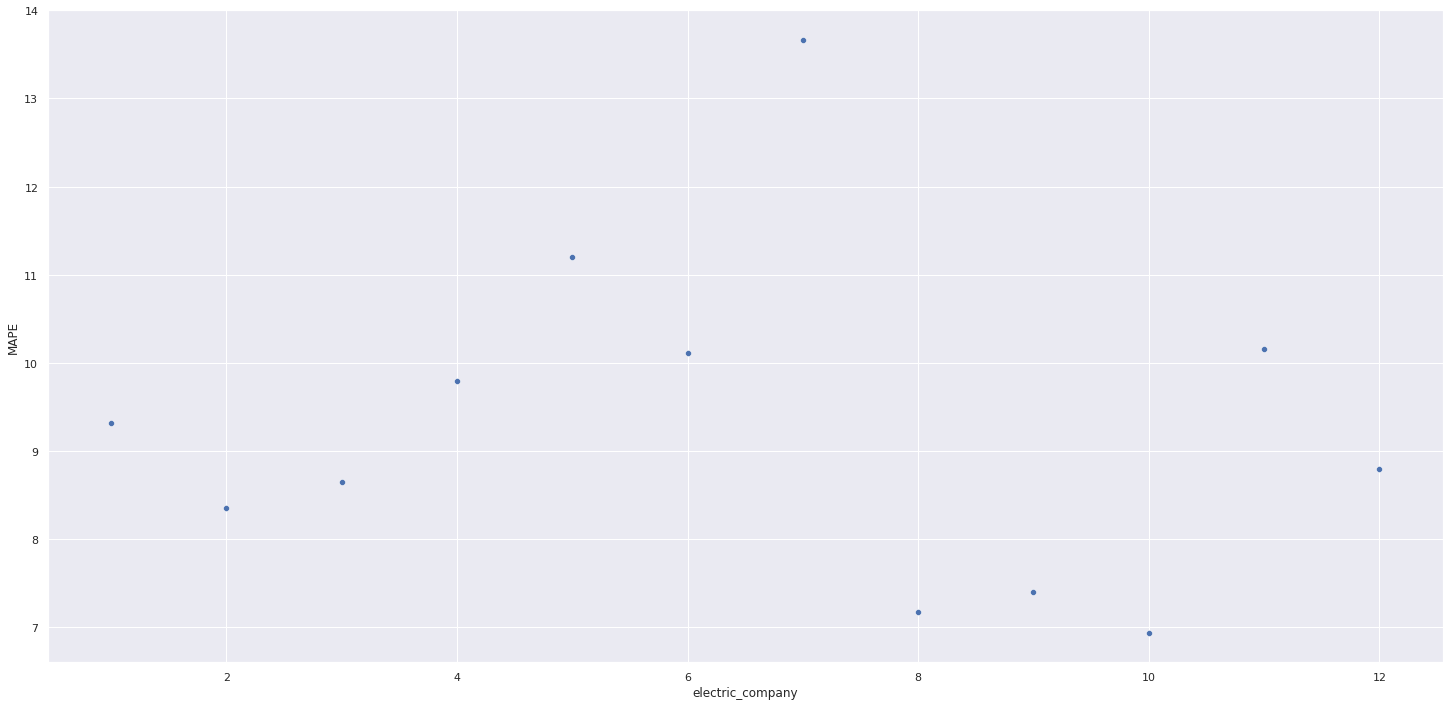

In [112]:
# Observing the distribution of the MAPE error in the graph, we can see that the model has very small errors in all cases. 
# It does not even reach the value of 0.15.
sns.scatterplot( x='electric_company', y='MAPE', data=df92 )

#  Total Performance

In [113]:
df93 = df92[['predictions', 'worst_scenario', 'best_scenario']].apply( lambda x: np.sum( x ), axis=0 ).reset_index().rename( columns={'index': 'Scenario', 0:'Values'} )
df93['Values'] = df93['Values'].map( '{:,.2f} MW'.format )
df93

,Scenario,Values
0,predictions,"1,140,122,833.10 MW"
1,worst_scenario,"1,140,110,878.98 MW"
2,best_scenario,"1,140,122,944.66 MW"


#  Machine Learning Performance

In [114]:
df9['error'] = df9['mw_energy_consumption'] - df9['predictions']
df9['error_rate'] = df9['predictions'] / df9['mw_energy_consumption']

# Remember that, as we have the forecast within three different years, I have separated them into three different datasets for better visualization.
df9_1 = df9[(df9['electric_company']==1) | (df9['electric_company']==2) | (df9['electric_company']==3) | (df9['electric_company']==4) | (df9['electric_company']==5) | (df9['electric_company']==6)
           | (df9['electric_company']==7) | (df9['electric_company']==8) | (df9['electric_company']==11) | (df9['electric_company']==12)]
df9_2 = df9[df9['electric_company']==9]
df9_3 = df9[df9['electric_company']==10]

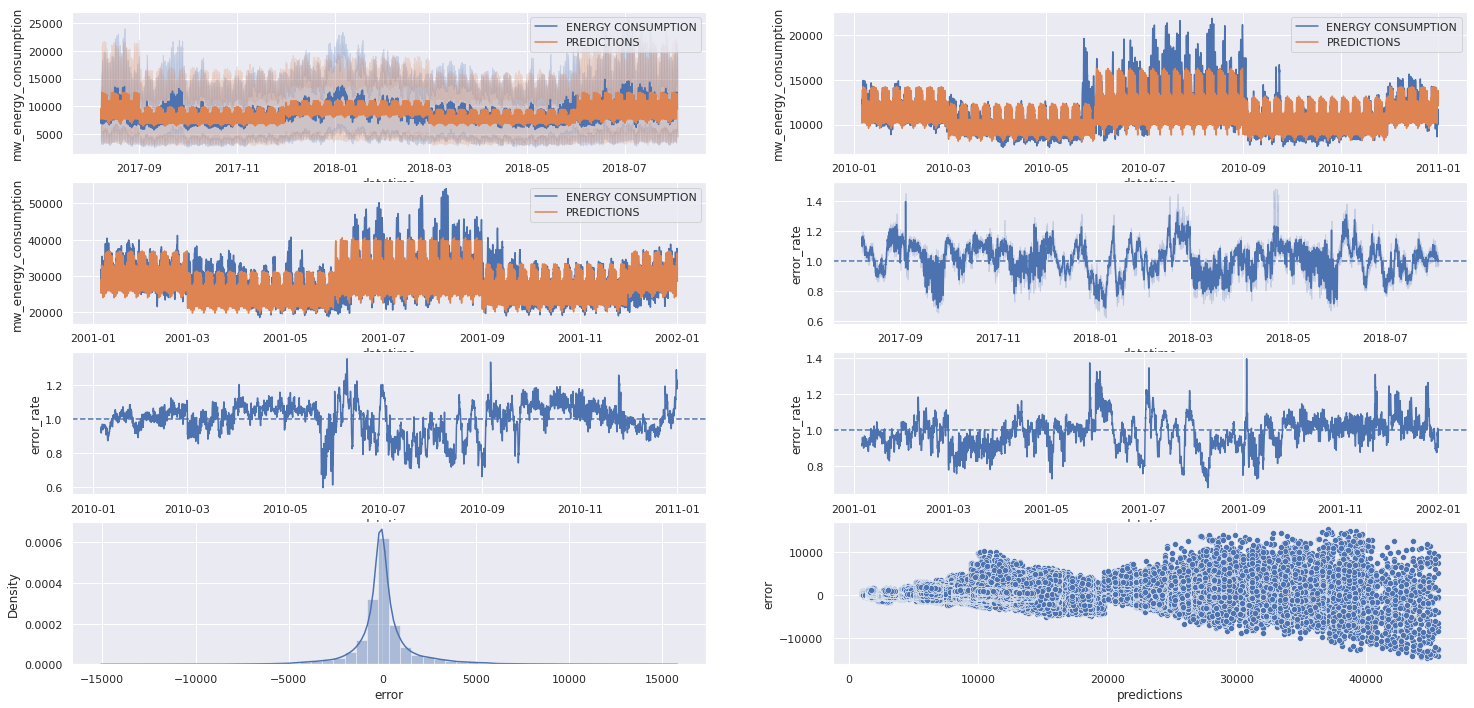

In [115]:
# Compare the real response with the one predicted and observe if the model is performing well. 
plt.subplot( 4, 2, 1 )
sns.lineplot( x='datetime', y='mw_energy_consumption', data=df9_1, label='ENERGY CONSUMPTION' )
sns.lineplot( x='datetime', y='predictions', data=df9_1, label='PREDICTIONS' )

plt.subplot( 4, 2, 2 )
sns.lineplot( x='datetime', y='mw_energy_consumption', data=df9_2, label='ENERGY CONSUMPTION' )
sns.lineplot( x='datetime', y='predictions', data=df9_2, label='PREDICTIONS' )

plt.subplot( 4, 2, 3 )
sns.lineplot( x='datetime', y='mw_energy_consumption', data=df9_3, label='ENERGY CONSUMPTION' )
sns.lineplot( x='datetime', y='predictions', data=df9_3, label='PREDICTIONS' )

# Insert a line passing the value 1 (one) to see the predictions in relation to a perfect prediction that would be the value 1 (one) itself.
plt.subplot( 4, 2, 4 )
sns.lineplot( x='datetime', y='error_rate', data=df9_1 )
plt.axhline( 1, linestyle='--' )

plt.subplot( 4, 2, 5 )
sns.lineplot( x='datetime', y='error_rate', data=df9_2 )
plt.axhline( 1, linestyle='--' )

plt.subplot( 4, 2, 6 )
sns.lineplot( x='datetime', y='error_rate', data=df9_3 )
plt.axhline( 1, linestyle='--' )

# To see the distribution of errors.
plt.subplot( 4, 2, 7 )
sns.distplot( df9['error'] )

plt.subplot( 4, 2, 8 )
sns.scatterplot( df9['predictions'], df9['error'] )